# Exploratory Data Analysis 

Doing a Exploratory Data Analysis using Python with Numpy, Pandas, Matplotlib and seaborn.

## 1. Problem definition

Can you accurately predict insurance costs?

## 2. Data

The original dataset can be found [here](https://www.kaggle.com/mirichoi0218/insurance)

## 3. Features

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

In [1]:
#Let´s import the necessary libraries 
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## I) Store the data in our system for analysis

In [2]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df.shape

(1338, 7)

## II) Exploratory Data Analysis

The data set looks like this;

In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


The above dataset, there are´not  discrepancies in the column header.

### Cheking the importance column´s for the analysis

In [5]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

All the columns are important

### Missing values
**There are mainly three types of missing values:**
* MCAR(Missing completely at random), do not depend on any other features.
* MAR (Missing at random), dependent on some other features.
* MNAR (Missing not at random), no reason for why they are missing

[Exploratory Data Analysis(EDA):Python by Kaushik Katari](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14)

In [7]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have not columns which contains missing values.

### Univariate Analysis

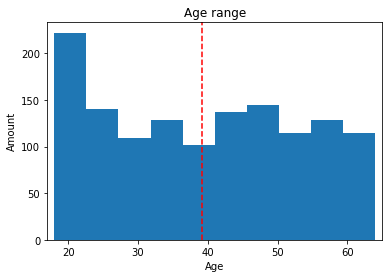

In [26]:
#Let´s see the age range in the data set
fig, ax = plt.subplots()
ax.hist(insurance_df.age, bins=10)
ax.set(title='Age range', xlabel='Age', ylabel='Amount')
ax.set_xlim([17,65])
ax.axvline(insurance_df.age.mean(), linestyle='--', c='red');

In the above plot it can be seen that the age range is almost homogenea.
Not outliers

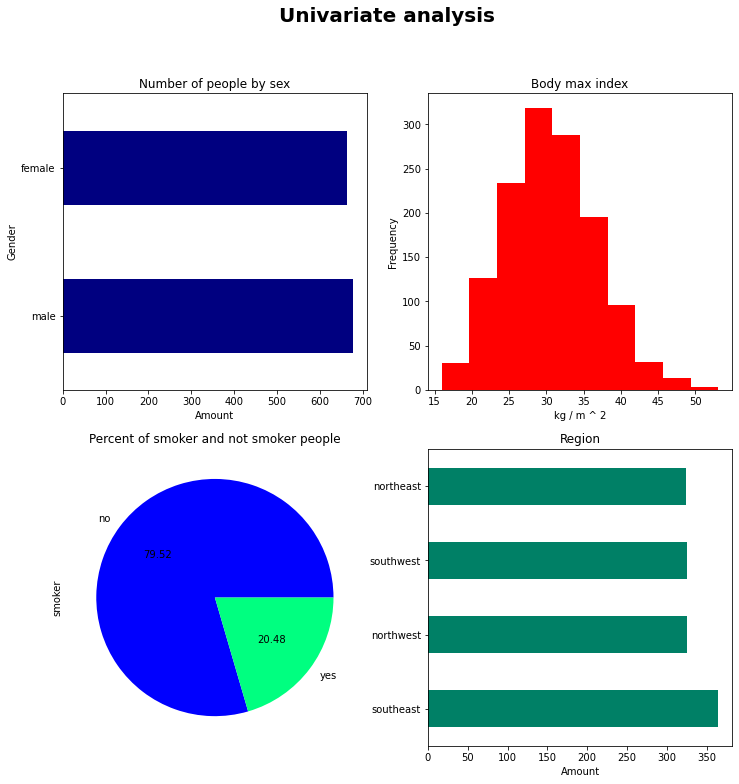

In [38]:
#Another univariate analysis
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
#sex
insurance_df['sex'].value_counts().plot(kind='barh', ax=ax0, cmap='gist_ncar')
ax0.set(title='Number of people by sex', xlabel='Amount', ylabel='Gender' )
#bmi
insurance_df['bmi'].plot(kind='hist', ax=ax1, cmap='flag')
ax1.set(title='Body max index', xlabel='kg / m ^ 2')
#smoker
insurance_df['smoker'].value_counts(normalize=True).plot.pie(ax=ax2, cmap='winter', autopct='%.2f', normalize=True)
ax2.set(title='Percent of smoker and not smoker people')
#region
insurance_df['region'].value_counts().plot(kind='barh', ax=ax3, cmap='summer')
ax3.set(title='Region', xlabel='Amount')
#Customizing fig
fig.suptitle('Univariate analysis', fontsize=20, fontweight='bold');

In the above plots it can see:
* Sample of gender homogeneo
* body max index percent follow the normal distribution
* Most people are non-smokers
* Sample of region homogeneo

In [41]:
#Children analysis
insurance_df.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

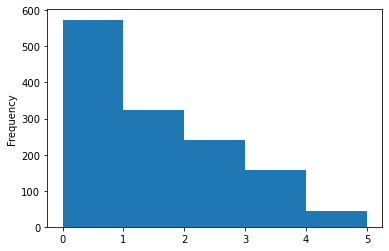

In [44]:
insurance_df.children.plot.hist(bins=5);

50% percent of the sample have 1 child

### Bivariate analysis

In [46]:
#(AGE,CHARGES), (BMI,CHARGES), (CHILDREN,CHARGES), (SMOKER, CHARGES)
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


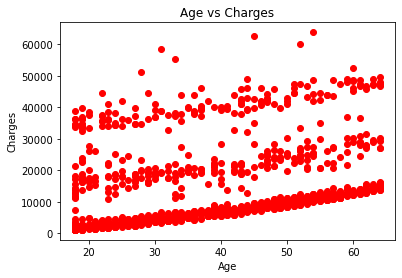

In [60]:
#Age vs charges analysis
fig, ax = plt.subplots()
ax.scatter(insurance_df['age'], insurance_df['charges'], c='red')
ax.set(title='Age vs Charges', xlabel='Age', ylabel='Charges');

In the above plot it is not clear to find a pattern

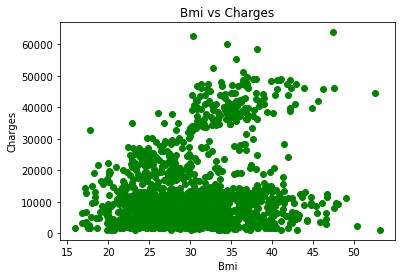

In [63]:
#Bmi vs charges analysis
fig, ax = plt.subplots()
ax.scatter(insurance_df['bmi'], insurance_df['charges'], c='green')
ax.set(title='Bmi vs Charges', xlabel='Bmi', ylabel='Charges');

In the above plot it is not clear to find a pattern

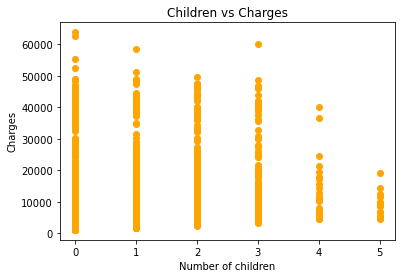

In [64]:
#Children vs Charges
fig, ax = plt.subplots()
ax.scatter(insurance_df['children'], insurance_df['charges'], c='orange')
ax.set(title='Children vs Charges', xlabel='Number of children', ylabel='Charges');

In the above plot it is not clear to find a pattern

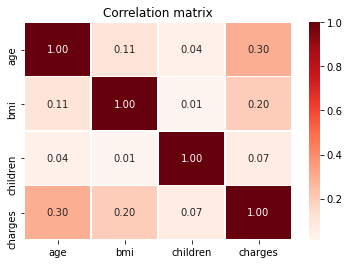

In [80]:
#Correlation matrix between 'age', 'bmi', 'children' and 'charges'
fig, ax = plt.subplots()
ax = sns.heatmap(insurance_df[['age', 'bmi', 'children', 'charges']].corr(), 
                 annot=True, 
                 cmap='Reds',
                 linewidths=0.5,
                 fmt='.2f')
ax.set(title='Correlation matrix');

There are no correlations greater than 0.5

In [73]:
insurance_df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [74]:
insurance_df.groupby('smoker')['charges'].median()

smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64

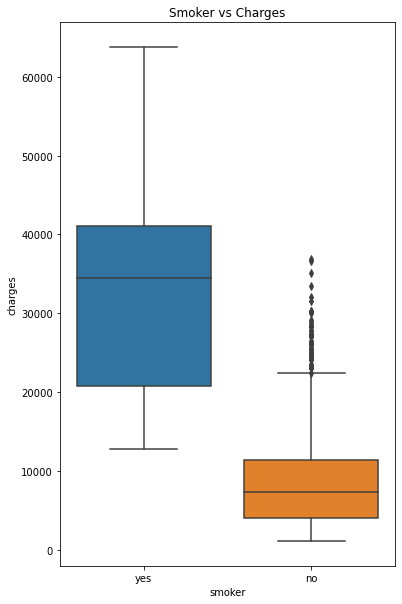

In [81]:
#Smoker vs Charges
fig , ax = plt.subplots(figsize=(6,10))
ax = sns.boxplot(insurance_df.smoker, insurance_df.charges)
ax.set(title='Smoker vs Charges');

As we can see, when we plot the Box Plot, the smoker people have more charges in their insurance.

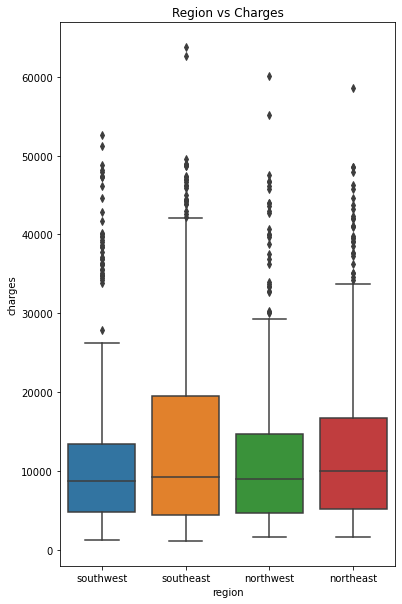

In [82]:
fig , ax = plt.subplots(figsize=(6,10))
ax = sns.boxplot(insurance_df.region, insurance_df.charges)
ax.set(title='Region vs Charges');

No relevant differences were found

### Multivariate Analysis

In [83]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


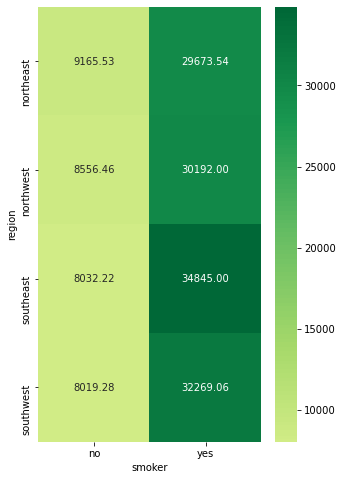

In [106]:
# Region and Smoker vs Charges
result = pd.pivot_table(data=insurance_df, index='region', columns='smoker', values='charges')
fig, ax = plt.subplots(figsize=(5,8))
ax = sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117, fmt='.2f');

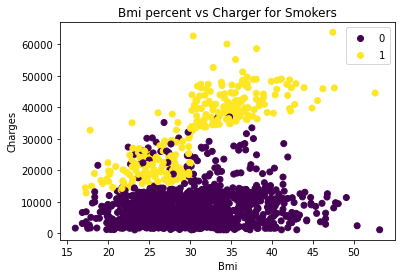

In [115]:
#Bmi vs Charger for Smokers
insurance_df['smoker rate'] = np.where(insurance_df.smoker=='yes',1,0)
fig, ax = plt.subplots()
graph1 = ax.scatter(x=insurance_df['bmi'],
           y=insurance_df['charges'],
           c=insurance_df['smoker rate'])
ax.set(title='Bmi percent vs Charger for Smokers', xlabel='Bmi', ylabel='Charges')
ax.legend(*graph1.legend_elements());

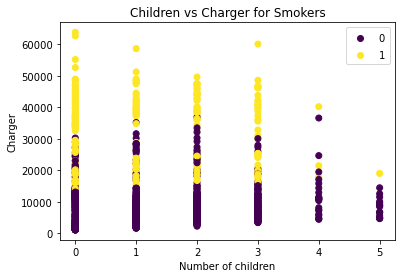

In [114]:
#Children vs chavs Charger for Smokers
fig, ax = plt.subplots()
graph2 = ax.scatter(x=insurance_df['children'],
           y=insurance_df['charges'],
           c=insurance_df['smoker rate'])
ax.set(title='Children vs Charger for Smokers', xlabel='Number of children', ylabel='Charger')
ax.legend(*graph2.legend_elements());

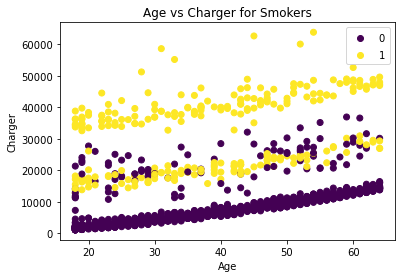

In [113]:
#Age vs Charger for Smokers
fig, ax = plt.subplots()
graph3 = ax.scatter(x=insurance_df['age'],
           y=insurance_df['charges'],
           c=insurance_df['smoker rate'])
ax.set(title='Age vs Charger for Smokers', xlabel='Age', ylabel='Charger')
ax.legend(*graph3.legend_elements());

# 3. Conclusions

* The feature 'smoker' is esencial to predict insurance cost.
* The smoker persons who has more than 30 Bmi, have a higher insurance cost.
* The smoker persons who has more age, have a litle higher insurance cost.

